In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle


In [2]:
raw_data = pd.read_csv('amazon.csv')
df=raw_data.copy()
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Preprocessing

In [4]:
# replacing string in rating column with mode value
df['rating'] = df['rating'].str.replace('|', df['rating'].mode()[0])

In [5]:
# changing data types
columns=['discounted_price','actual_price','discount_percentage','rating']
for col in columns:
    df[col]=df[col].str.replace('₹','').str.replace(',','').str.replace('%','').astype(float)

In [6]:
# splitting string columns
df['user_id']=df['user_id'].str.split(',')
df['user_name']=df['user_name'].str.split(',')
df['review_id']=df['review_id'].str.split(',')
df['review_title']=df['review_title'].str.split(',')

In [ ]:
# creating new dataframe with user data
user_data = {
    'user_id': [id[0] for id in df['user_id']],
    'user_name': [name[0] for name in df['user_name']],
    'review_id': [id[0] for id in df['review_id']],
    'review_title': [title[0] for title in df['review_title']]
}

user_df = pd.DataFrame(user_data)
user_df.head()

,user_id,user_name,review_id,review_title
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied
1,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,A Good Braided Cable for Your Type C Device
2,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,Good speed for earlier versions
3,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,Good product
4,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,As good as original


In [8]:
user_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1465 non-null   object
 1   user_name     1465 non-null   object
 2   review_id     1465 non-null   object
 3   review_title  1465 non-null   object
dtypes: object(4)
memory usage: 45.9+ KB


In [9]:
# dropping unnnecessary columns from main dataframe
df.drop(columns=['user_id','user_name','review_id','review_title'],inplace=True)

In [10]:
# concating main dataframe and user dataframe
final_df=pd.concat([df,user_df],axis=1)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   review_content       1465 non-null   object 
 10  img_link             1465 non-null   object 
 11  product_link         1465 non-null   object 
 12  user_id              1465 non-null   object 
 13  user_name            1465 non-null   object 
 14  review_id            1465 non-null   object 
 15  review_title         1465 non-null   o

In [12]:
final_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
review_content         0
img_link               0
product_link           0
user_id                0
user_name              0
review_id              0
review_title           0
dtype: int64

In [13]:
# dropping duplicates from product_name column
final_df.dropna(subset=['rating_count'],inplace=True)
final_df.drop_duplicates(subset=['product_name'],inplace=True)
final_df.reset_index(inplace=True,drop=True)

In [14]:
final_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_content,img_link,product_link,user_id,user_name,review_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,A Good Braided Cable for Your Type C Device
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,Good speed for earlier versions
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,Good product
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,As good as original


In [15]:
final_df.shape

(1335, 16)

In [16]:
final_df['review_content'][56]

"I use this to connect an old PC to internet. I tried lubuntu 20 and ubuntu 22, it worked out of the box in both, didn't have to do any setup. There's an extender cable so you can place this in a comfortable place. Get the model with antenna because otherwise you'll have range problems if you're not directly in line of sight from your wifi router.,The wifi dongle is a simple plug & play device, will start catching available networks right after you plug it into your USB port, no additional installations/ softwares requires. Signal strength is good.... just wonder what would be different in other adapters of lesser known brands which are available at a much more competitive pricing, hence a star less.,Pros:*Easy to use & Portable*Can be connected to Mobile Hotspot and used in PC( Budget Friendly)*Less installation process*No heating issues & Good Coverage*Best alternative for USB Tethering (phone's battery may get damaged for long term run with Tethering)Cons:*Internet connection speed 

In [17]:
import re

# Function to remove special characters and emojis
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove emojis and special characters, keep only letters, numbers and basic punctuation
    text = re.sub(r'[^\w\s!?]', '', text)
    # convert text to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply cleaning to review_content column
final_df['review_content'] = final_df['review_content'].apply(clean_text)
final_df['about_product'] = final_df['about_product'].apply(clean_text)
final_df['review_title'] = final_df['review_title'].apply(clean_text)


In [18]:
final_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_content,img_link,product_link,user_id,user_name,review_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",high compatibility compatible with iphone 12 1...,looks durable charging is fine toono complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,satisfied
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994",compatible with all type c enabled devices be ...,i ordered this cable to connect my phone to an...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,a good braided cable for your type c device
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",fast charger data syncwith builtin safety proc...,not quite durable and sturdy good nice product...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,good speed for earlier versions
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",the boat deuce usb 300 2 in 1 cable is compati...,good productlong wirecharges goodnicei bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,good product
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",charge sync function this cable comes with cha...,bought this instead of original apple does the...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,as good as original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,"1,090",supreme quality 90 gram 3 layer thik pp spun f...,i received product without spannerexcellent pr...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,AHITFY6AHALOFOHOZEOC6XBP4FEA,Prabha ds,R3G3XFHPBFF0E8,received the product without spanner
1331,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,"4,118",230 volts 400 watts 1 year,okgot everything as mentioned but the measurin...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,Manu Bhai,R3DDL2UPKQ2CK9,ok
1332,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468,international design and stylingtwo heat setti...,plastic but cool body u have to find sturdy su...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,Nehal Desai,R1TLRJVW4STY5I,very good
1333,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,"8,031",fan sweep area 230 mm noise level 40 45 db fan...,i have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,AF2JQCLSCY3QJATWUNNHUSVUPNQQ,Shubham Dubey,R39Q2Y79MM9SWK,fan sp

In [19]:
final_df.to_csv('cleaned_amazon.csv',index=False)

## plots

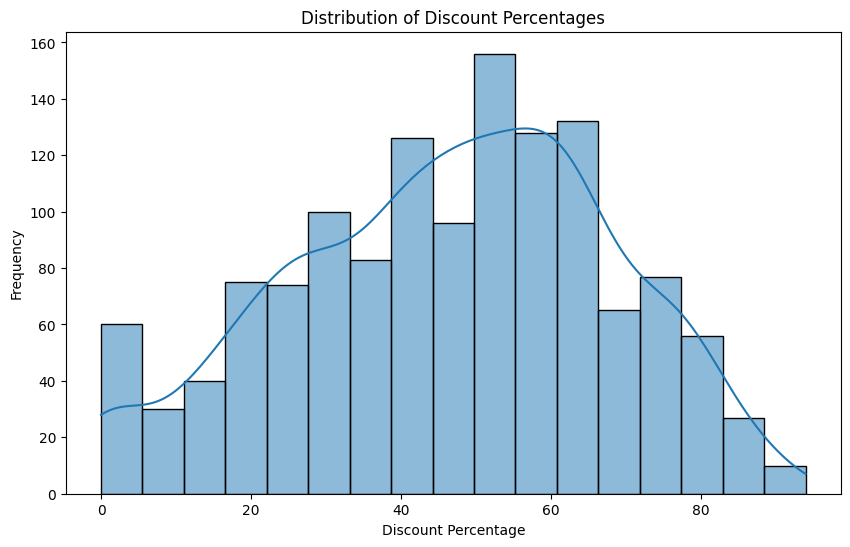

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['discount_percentage'], kde=True )
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

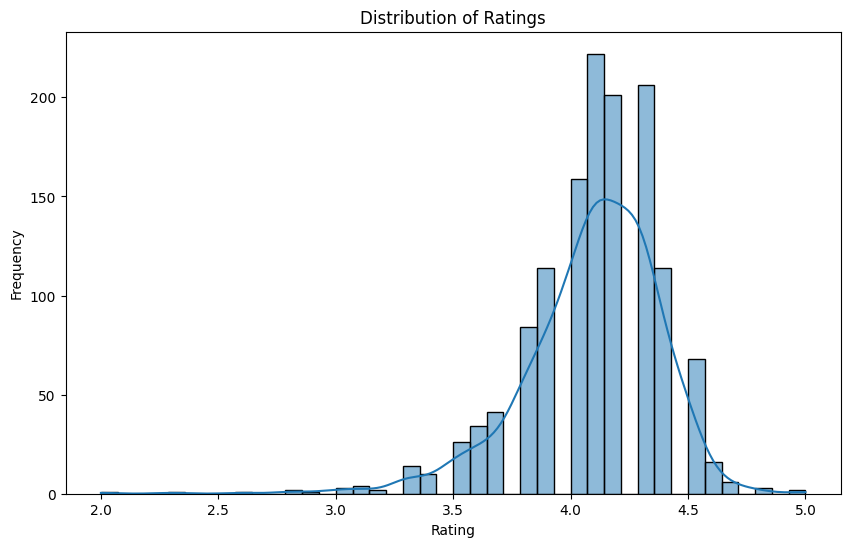

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

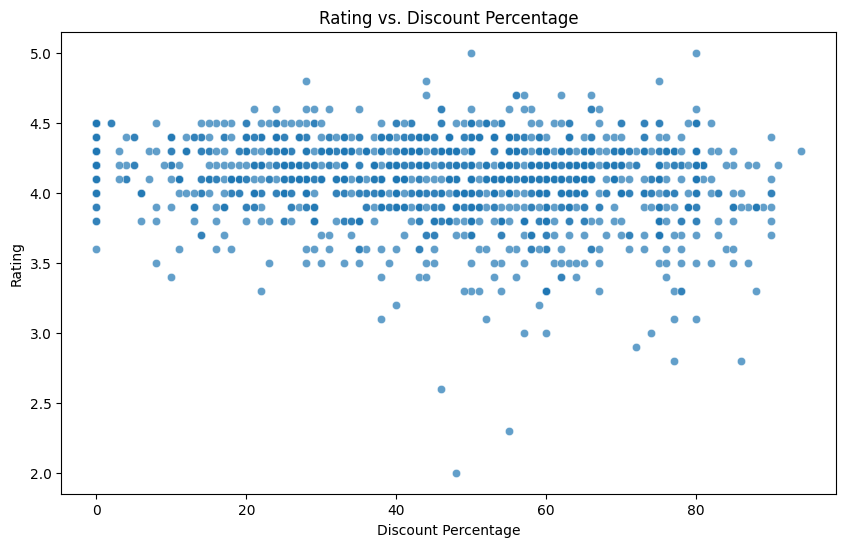

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='discount_percentage', y='rating', alpha=0.7)
plt.title('Rating vs. Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()


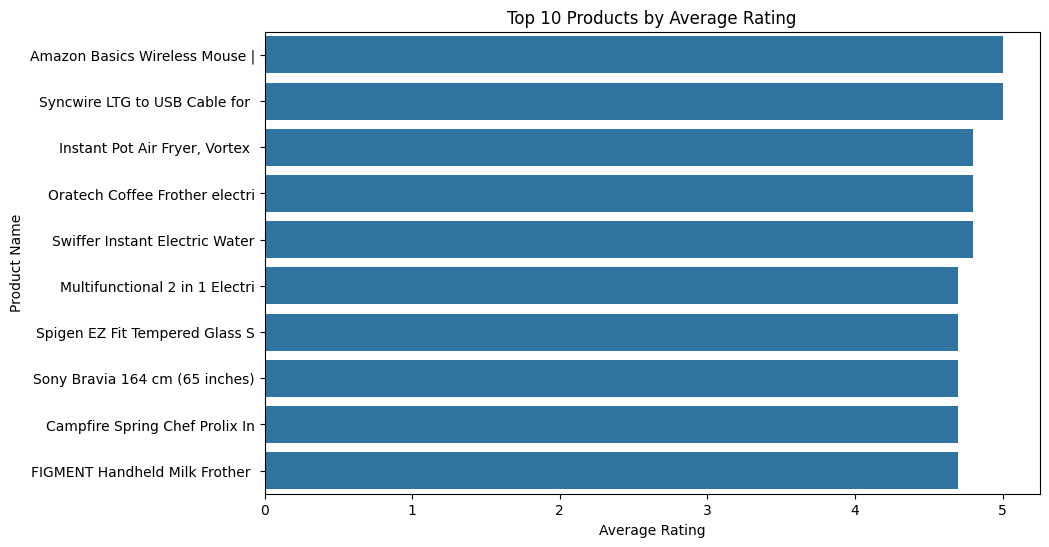

In [23]:
top_rated_products = final_df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_products.values, y=top_rated_products.index.str[:30])
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()


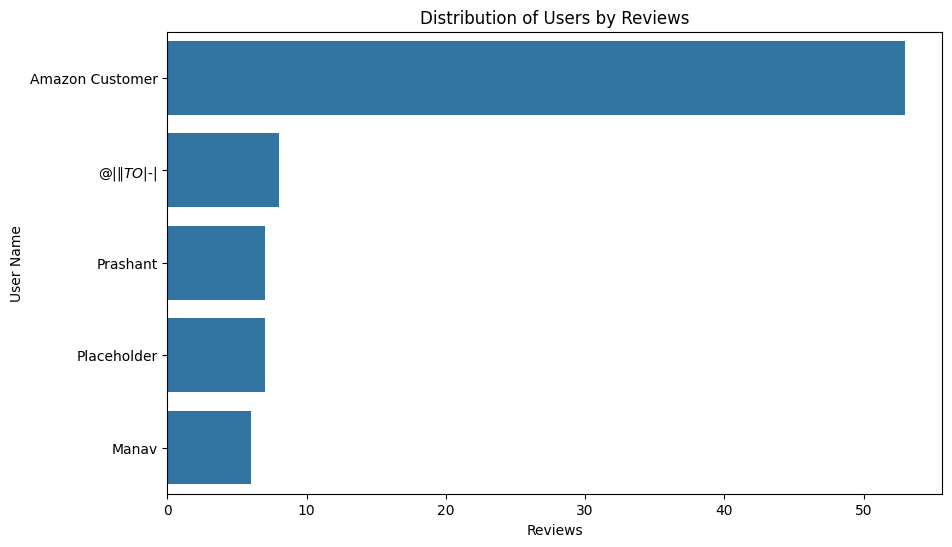

In [24]:
top_users_by_reviews=final_df.groupby('user_name').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_users_by_reviews.index, x=top_users_by_reviews.values)
plt.title('Distribution of Users by Reviews')
plt.xlabel('Reviews')
plt.ylabel('User Name')
plt.show()

In [25]:
final_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_content,img_link,product_link,user_id,user_name,review_id,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",high compatibility compatible with iphone 12 1...,looks durable charging is fine toono complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,satisfied
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994",compatible with all type c enabled devices be ...,i ordered this cable to connect my phone to an...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,a good braided cable for your type c device
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",fast charger data syncwith builtin safety proc...,not quite durable and sturdy good nice product...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,good speed for earlier versions
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",the boat deuce usb 300 2 in 1 cable is compati...,good productlong wirecharges goodnicei bought ...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,good product
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",charge sync function this cable comes with cha...,bought this instead of original apple does the...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,as good as original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,"1,090",supreme quality 90 gram 3 layer thik pp spun f...,i received product without spannerexcellent pr...,https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,AHITFY6AHALOFOHOZEOC6XBP4FEA,Prabha ds,R3G3XFHPBFF0E8,received the product without spanner
1331,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,"4,118",230 volts 400 watts 1 year,okgot everything as mentioned but the measurin...,https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,Manu Bhai,R3DDL2UPKQ2CK9,ok
1332,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,3.6,468,international design and stylingtwo heat setti...,plastic but cool body u have to find sturdy su...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,Nehal Desai,R1TLRJVW4STY5I,very good
1333,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,4.0,"8,031",fan sweep area 230 mm noise level 40 45 db fan...,i have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,AF2JQCLSCY3QJATWUNNHUSVUPNQQ,Shubham Dubey,R39Q2Y79MM9SWK,fan sp

## Collaborative filtering

In [26]:
# combining all text columns into one
final_df['combined_feature']=final_df['product_name']+' '+final_df['about_product']+' '+final_df['review_content']+final_df['review_title']
final_df['combined_feature'][0]

'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) high compatibility compatible with iphone 12 11 xxsmaxxr iphone 88 plusiphone 77 plusiphone 6s6s plusiphone 66 plusiphone 55s5cseipad proipad air 12ipad mini 123ipod nano7ipod touch and more apple devicesfast chargedata sync it can charge and sync simultaneously at a rapid speed compatible with any charging adaptor multiport charging station or power bankdurability durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibilityhigh security level it is designed to fully protect your device from damaging excessive currentcopper core thickmultilayer shielding antiinterference protective circuit equipmentwarranty 12 months warranty and friendly customer services ensures the longtime enjoyment of your purchase if

In [27]:
# creating pivot table
product_pivot= pd.pivot_table(final_df, values='rating',index='product_name',columns='user_name',fill_value=0)
product_pivot.head()

user_name,$@|\|TO$|-|,& I Am IronMan,(sic),123MovieTime,9640185788,9848023076,A H.,A K Rai,A. Dubey,A.D.PAUL & CO.,...,virender malhotra,vivek vinod,yash,yogita ratre,zain,ˢᴰ82ˢᶜ ✔️,अशोक वैष्णव,⚡ Pushpendra Singh Patel ⚡,𝕵𝖆𝖙𝖎𝖓 𝕮𝖍𝖆𝖉𝖍𝖆,🤘🏻🤘🏻
product_name,,,,,,,,,,,,,,,,,,,,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from scipy.sparse import csr_matrix
product_sparse = csr_matrix(product_pivot)
product_sparse

<1335x1087 sparse matrix of type '<class 'numpy.float64'>'
	with 1335 stored elements in Compressed Sparse Row format>

In [29]:
# creating clustering model
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='auto')
model.fit(product_sparse)

NearestNeighbors()

In [30]:
distances, recomends = model.kneighbors(product_pivot.iloc[6,:].values.reshape(1,-1), n_neighbors=6)
print(f"distances={distances}")
print(f'recomends={recomends}')

distances=[[0.         0.9        3.77359245 3.9408121  4.12310563 4.25205833]]
recomends=[[  6 282 546 786 417 661]]


In [31]:
# Getting recommended products
for i in range(len(recomends)):
    print(product_pivot.index[recomends[i]])

Index(['4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush',
       'Crompton IHL 152 1500-Watt Immersion Water Heater with Copper Heating Element (Black)',
       'Khaitan ORFin Fan heater for Home and kitchen-K0 2215',
       'Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)',
       'Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging',
       'MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)'],
      dtype='object', name='product_name')


## Content Based filtering

In [32]:
# creating tfidf matrix
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix=Vectorizer.fit_transform(final_df['combined_feature'])

# calculating cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [33]:
product_indices = pd.Series( final_df.index,index=final_df['product_name']).drop_duplicates()
product_indices

product_name
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                            0
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)             1
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                                      2
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)       3
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                                             

In [115]:
query_product=product_indices.sample().index[0]
query_product

'GILTON Egg Boiler Electric Automatic Off 7 Egg Poacher for Steaming, Cooking Also Boiling and Frying, Multi Color'

In [116]:
# Function to get product recommendations based on similarity
def recommend_products(product_name, cosine_sim=cosine_sim, num_recommendations=6):
    idx = product_indices[product_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    product_indices_recommended = [i[0] for i in sim_scores]
    return final_df['product_name'].iloc[product_indices_recommended]

# Example usage
# query_product='Prestige IRIS Plus 750 watt mixer grinder'
recommendations = recommend_products(query_product)
print(recommendations)

958     Simxen Egg Boiler Electric Automatic Off 7 Egg...
1090    Wipro Vesta Electric Egg Boiler, 360 Watts, 3 ...
939     SOFLIN Egg Boiler Electric Automatic Off 7 Egg...
1124    Borosil Electric Egg Boiler, 8 Egg Capacity, F...
1100    Lifelong 2-in1 Egg Boiler and Poacher 500-Watt...
1002                   Themisto 350 Watts Egg Boiler-Blue
Name: product_name, dtype: object


In [117]:
# Get the image links for the recommended products
recommended_images = final_df[final_df['product_name'].isin(recommendations)]['img_link'].to_list()
print(recommended_images)

['https://m.media-amazon.com/images/I/31zTQCdL35S._SX300_SY300_QL70_FMwebp_.jpg', 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31-RWRwJZOL._SX300_SY300_QL70_FMwebp_.jpg', 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/315o5vpD66L._SX300_SY300_QL70_FMwebp_.jpg', 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31qZm3DyDhL._SX300_SY300_QL70_FMwebp_.jpg', 'https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/41LLX-A7eTL._SX300_SY300_QL70_FMwebp_.jpg', 'https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/41MJ2hsq4LL._SX300_SY300_QL70_FMwebp_.jpg']


## Evaluation

In [118]:
# Evaluation Metrics
def precision_at_k(recommended_items, relevant_items, k):
    """Precision@K: Fraction of recommended items that are relevant."""
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k) & set(relevant_items)
    return len(relevant_at_k) / k

def dcg_at_k(relevance_scores, k):
    """Compute Discounted Cumulative Gain (DCG)."""
    relevance_scores = relevance_scores[:k]
    return sum([rel / np.log2(idx + 2) for idx, rel in enumerate(relevance_scores)])

def ndcg_at_k(recommended_items, relevant_items, k):
    """nDCG@K: Rank-sensitive metric for recommendation quality."""
    relevance_scores = [1 if item in relevant_items else 0 for item in recommended_items]
    dcg = dcg_at_k(relevance_scores, k)
    ideal_relevance = sorted(relevance_scores, reverse=True)
    idcg = dcg_at_k(ideal_relevance, k)
    return dcg / idcg if idcg > 0 else 0

def coverage(recommendation_function, product_list, total_products):
    """Coverage: Fraction of total products recommended."""
    unique_recommended = set()
    for product in product_list:
        recommendations = recommendation_function(product)
        unique_recommended.update(recommendations)
    return len(unique_recommended) / total_products

In [119]:

from sklearn.cluster import KMeans

# Expand Ground Truth: Use categories
def generate_ground_truth_by_category(data, top_n=5):
    """Generate ground truth for products based on their category."""
    ground_truth = {}
    for category in data['category'].unique():
        # Get products in this category
        category_products = data[data['category'] == category]['product_name'].tolist()
        # Assign top_n relevant products for each product in this category
        for product in category_products:
            ground_truth[product] = [p for p in category_products if p != product][:top_n]
    return ground_truth

# Generate ground truth by category
category_based_ground_truth = generate_ground_truth_by_category(final_df)

# Expand Ground Truth: Use clustering
def generate_ground_truth_by_clustering(data, tfidf_matrix, n_clusters=20, top_n=5):
    """Generate ground truth based on clustering of combined features."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(tfidf_matrix)
    
    # Create ground truth based on clusters
    ground_truth = {}
    for cluster in data['cluster'].unique():
        cluster_products = data[data['cluster'] == cluster]['product_name'].tolist()
        for product in cluster_products:
            ground_truth[product] = [p for p in cluster_products if p != product][:top_n]
    return ground_truth

# Generate ground truth by clustering
clustering_based_ground_truth = generate_ground_truth_by_clustering(final_df, tfidf_matrix)

# Combine Ground Truth
def combine_ground_truths(*ground_truths):
    """Combine multiple ground truth dictionaries."""
    combined_gt = {}
    for gt in ground_truths:
        for key, value in gt.items():
            if key not in combined_gt:
                combined_gt[key] = set(value)
            else:
                combined_gt[key].update(value)
    # Convert sets back to lists
    for key in combined_gt:
        combined_gt[key] = list(combined_gt[key])
    return combined_gt

# Combining category and clustering-based ground truth
final_ground_truth = combine_ground_truths(category_based_ground_truth, clustering_based_ground_truth)


In [120]:
# Evaluation

relevant_items = final_ground_truth.get(query_product, [])
k = len(relevant_items)
precision = precision_at_k(recommendations, relevant_items, k)
ndcg = ndcg_at_k(recommendations, relevant_items, k)
total_products = len(product_indices)

# Coverage
product_list = list(final_ground_truth.keys())
coverage_score = coverage(recommend_products, product_list, total_products)

# Print Evaluation Metrics
print(f"Precision @ {k}: {precision:.2f}")
print(f"nDCG @ {k}: {ndcg:.2f}")
print(f"Coverage: {coverage_score:.2%}")

Precision @ 10: 0.40
nDCG @ 10: 0.97
Coverage: 91.91%


## Saving models and files

In [40]:
# Save the model to disk
with open('recommendation_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the product pivot table to disk
with open('product_pivot.pkl', 'wb') as file:
    pickle.dump(product_pivot, file)


# Save the product indices to disk
with open('product_indices.pkl', 'wb') as file:
    pickle.dump(product_indices, file)


# Save the cosine similarity matrix to disk
with open('cosine_sim.pkl', 'wb') as file:
    pickle.dump(cosine_sim, file)

# Save the TF-IDF matrix to disk
with open('tfidf_matrix.pkl', 'wb') as file:
    pickle.dump(tfidf_matrix, file)